In [1]:
#Loading Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
%matplotlib inline
import scipy.stats

In [10]:
from IPython.core.interactiveshell import InteractiveShell

In [21]:
df=pd.read_csv("C://Users//edingha//Documents//Business Analytics//Consulting//NPS_training.csv")
df_test=pd.read_csv("C://Users//edingha//Documents//Business Analytics//Consulting//NPS_test.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 52 columns):
SN                                4989 non-null int64
HospitalNo2                       4989 non-null int64
MaritalStatus                     4989 non-null object
AgeYrs                            4989 non-null float64
Sex                               4989 non-null object
BedCategory                       4989 non-null object
Department                        4989 non-null object
Estimatedcost                     4989 non-null float64
InsPayorcategory                  4989 non-null object
State                             4989 non-null object
Country                           4989 non-null object
STATEZONE                         4989 non-null object
CE_ACCESSIBILITY                  4989 non-null int64
CE_CSAT                           4989 non-null int64
CE_VALUEFORMONEY                  4989 non-null int64
EM_IMMEDIATEATTENTION             4989 non-null int64
EM_NURSING       

In [4]:
df.describe()

,SN,HospitalNo2,AgeYrs,Estimatedcost,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,...,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,LengthofStay,CE_NPS
count,4989.000000,4989.000000,4989.000000,4.989000e+03,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,...,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,2495.000000,46453.037082,39.695771,8.323555e+04,3.623572,3.498497,3.343355,3.830427,3.856685,3.875927,...,3.668872,3.684105,3.703147,3.641812,3.637402,3.280216,3.481860,3.384446,4.336140,8.514131
std,1440.344577,29123.669384,22.638360,1.020465e+05,0.563005,0.580220,0.660313,0.439285,0.397095,0.376271,...,0.520043,0.516789,0.484599,0.550737,0.548209,0.724508,0.628705,0.674402,5.067573,1.662132
min,1.000000,4167.000000,0.300000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1248.000000,19099.000000,25.000000,3.000000e+04,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,8.000000
50%,2495.000000,44836.000000,37.000000,5.000000e+04,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,9.000000
75%,3742.000000,72112.000000,59.000000,9.000000e+04,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,10.000000
max,4989.000000,98618.000000,97.000000,1.500000e+06,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,80.000000,10.000000


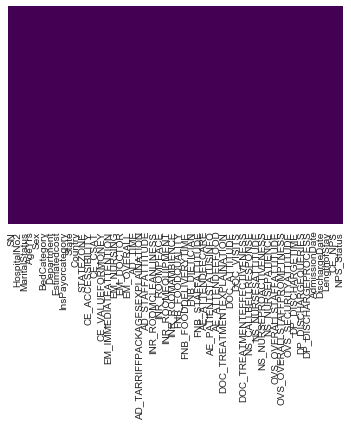

In [11]:
#Missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

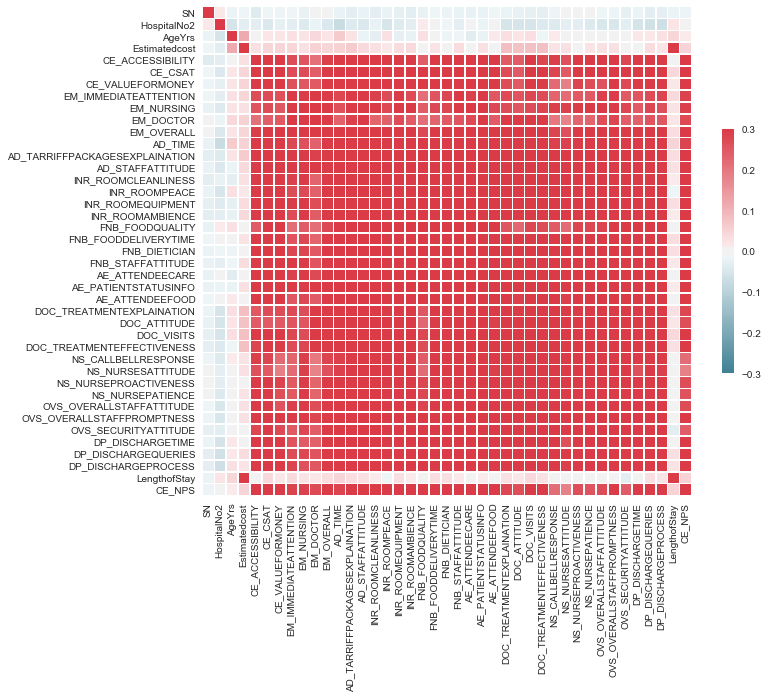

In [6]:
#Heat Mpa
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
#coverting dependent variable as binominal
df['NPS_Status'] = df['NPS_Status'].map( {'Promotor': 0, 'Detractor': 1} ).astype(int)
df_test['NPS_Status'] = df_test['NPS_Status'].map( {'Promotor': 0, 'Detractor': 1} ).astype(int)

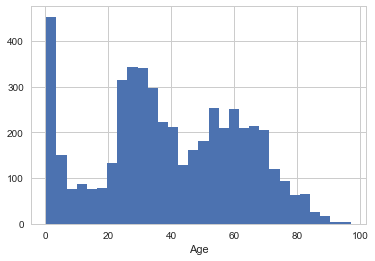

In [113]:
#Exploratory Analysis
sns.set_style('whitegrid')
df['AgeYrs'].hist(bins=30)
plt.xlabel('Age')

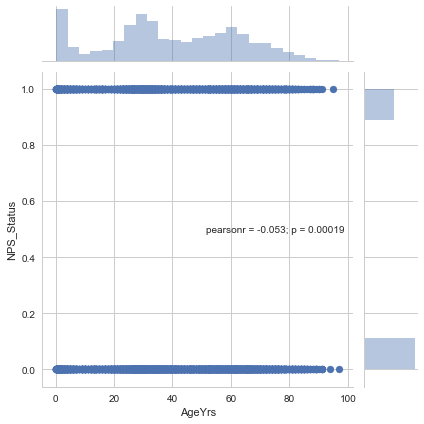

In [114]:
sns.jointplot(x='AgeYrs',y='NPS_Status',data=df)

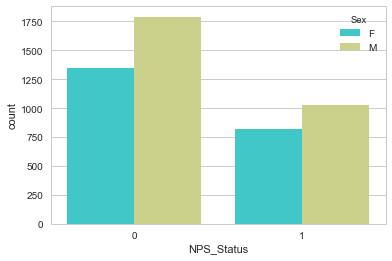

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='NPS_Status',hue='Sex',data=df,palette='rainbow')

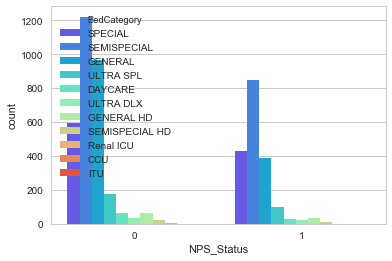

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='NPS_Status',hue='BedCategory',data=df,palette='rainbow')

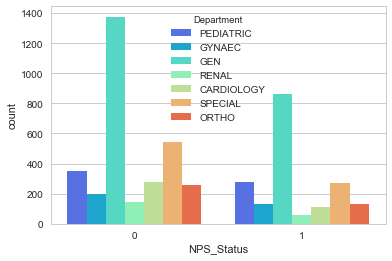

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='NPS_Status',hue='Department',data=df,palette='rainbow')

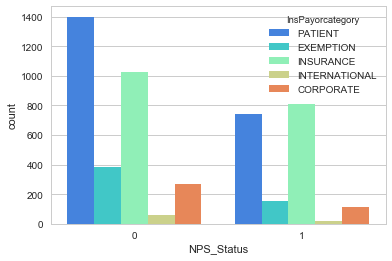

In [118]:

sns.set_style('whitegrid')
sns.countplot(x='NPS_Status',hue='InsPayorcategory',data=df,palette='rainbow')

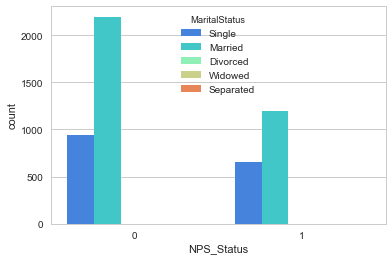

In [119]:

sns.set_style('whitegrid')
sns.countplot(x='NPS_Status',hue='MaritalStatus',data=df,palette='rainbow')

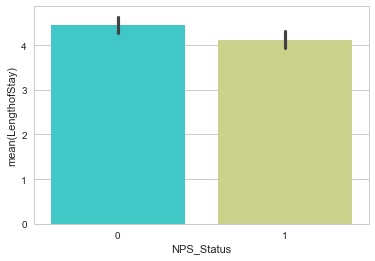

In [120]:

sns.set_style('whitegrid')
sns.barplot(x='NPS_Status', y="LengthofStay", data=df,
            label="Total", color="b",palette='rainbow')

#Chi-Squar test

In [121]:
cont = pd.crosstab(df["NPS_Status"],df["Sex"])
#chi2,p=scipy.stats.chi2_contingency(cont)
chi2, p, ddof, expected = scipy.stats.chi2_contingency( cont )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 0.7228797895229713
p-value: 0.3952009075925038
Degrees of Freedom: 1

[[ 1363.87652836  1776.12347164]
 [  803.12347164  1045.87652836]]


In [122]:
cont = pd.crosstab(df["NPS_Status"],df["MaritalStatus"])
#chi2,p=scipy.stats.chi2_contingency(cont)
chi2, p, ddof, expected = scipy.stats.chi2_contingency( cont )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )
cont

Test Statistic: 17.409602018982756
p-value: 0.001608939042540311
Degrees of Freedom: 4

[[  6.29384646e-01   2.13424334e+03   6.29384646e-01   1.00198036e+03
    2.51753858e+00]
 [  3.70615354e-01   1.25675666e+03   3.70615354e-01   5.90019643e+02
    1.48246142e+00]]


MaritalStatus,Divorced,Married,Separated,Single,Widowed
NPS_Status,,,,,
0,0,2196,1,941,2
1,1,1195,0,651,2


In [123]:
cont = pd.crosstab(df["NPS_Status"],df["InsPayorcategory"])
#chi2,p=scipy.stats.chi2_contingency(cont)
chi2, p, ddof, expected = scipy.stats.chi2_contingency( cont )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 71.16472442810749
p-value: 1.2883924846830678e-14
Degrees of Freedom: 4

[[  241.0543195    342.38524754  1156.17959511    50.3507717   1350.03006615]
 [  141.9456805    201.61475246   680.82040489    29.6492283    794.96993385]]


In [124]:
cont = pd.crosstab(df["NPS_Status"],df["Department"])
#chi2,p=scipy.stats.chi2_contingency(cont)
chi2, p, ddof, expected = scipy.stats.chi2_contingency( cont )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )



Test Statistic: 40.066808870211645
p-value: 4.419495653195618e-07
Degrees of Freedom: 6

[[  244.83062738  1409.19222289   207.06754861   244.20124273   392.1066346
    130.28262177   512.31910202]
 [  144.16937262   829.80777711   121.93245139   143.79875727   230.8933654
     76.71737823   301.68089798]]


In [125]:
cont = pd.crosstab(df["NPS_Status"],df["BedCategory"])
#chi2,p=scipy.stats.chi2_contingency(cont)
chi2, p, ddof, expected = scipy.stats.chi2_contingency( cont )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 69.8639739948415
p-value: 4.7101521579993736e-11
Degrees of Freedom: 10

[[  6.29384646e-01   5.72740028e+01   8.49669272e+02   5.97915414e+01
    6.29384646e-01   1.25876929e+00   1.30030868e+03   1.82521547e+01
    6.44489878e+02   3.52455402e+01   1.72451393e+02]
 [  3.70615354e-01   3.37259972e+01   5.00330728e+02   3.52084586e+01
    3.70615354e-01   7.41230708e-01   7.65691321e+02   1.07478453e+01
    3.79510122e+02   2.07544598e+01   1.01548607e+02]]


In [23]:
#Encoding Variables 

sex = pd.get_dummies(df['Sex'],drop_first=True,prefix='sex')
marriage = pd.get_dummies(df['MaritalStatus'],drop_first=True,prefix='marriage')
bed = pd.get_dummies(df['BedCategory'],drop_first=True,prefix='bed')
department = pd.get_dummies(df['Department'],drop_first=True,prefix='department')
payment = pd.get_dummies(df['InsPayorcategory'],drop_first=True,prefix='InsPayorcategory')

df.drop(['Sex','MaritalStatus','BedCategory','Department','InsPayorcategory'],axis=1,inplace=True)

df = pd.concat([df,marriage,bed,department,payment,sex],axis=1)





In [24]:
#Encoding Variables 

sex = pd.get_dummies(df_test['Sex'],drop_first=True,prefix='sex')
marriage = pd.get_dummies(df_test['MaritalStatus'],drop_first=True,prefix='marriage')
bed = pd.get_dummies(df_test['BedCategory'],drop_first=True,prefix='bed')
department = pd.get_dummies(df_test['Department'],drop_first=True,prefix='department')
payment = pd.get_dummies(df_test['InsPayorcategory'],drop_first=True,prefix='InsPayorcategory')

df_test.drop(['Sex','MaritalStatus','BedCategory','Department','InsPayorcategory'],axis=1,inplace=True)

df_test = pd.concat([df_test,marriage,bed,department,payment,sex],axis=1)


In [25]:
df['AgeYrs']=np.log(df['AgeYrs'])
df_test['AgeYrs']=np.log(df_test['AgeYrs'])

In [26]:
df.columns

Index(['SN', 'HospitalNo2', 'AgeYrs', 'Estimatedcost', 'State', 'Country',
       'STATEZONE', 'CE_ACCESSIBILITY', 'CE_CSAT', 'CE_VALUEFORMONEY',
       'EM_IMMEDIATEATTENTION', 'EM_NURSING', 'EM_DOCTOR', 'EM_OVERALL',
       'AD_TIME', 'AD_TARRIFFPACKAGESEXPLAINATION', 'AD_STAFFATTITUDE',
       'INR_ROOMCLEANLINESS', 'INR_ROOMPEACE', 'INR_ROOMEQUIPMENT',
       'INR_ROOMAMBIENCE', 'FNB_FOODQUALITY', 'FNB_FOODDELIVERYTIME',
       'FNB_DIETICIAN', 'FNB_STAFFATTITUDE', 'AE_ATTENDEECARE',
       'AE_PATIENTSTATUSINFO', 'AE_ATTENDEEFOOD', 'DOC_TREATMENTEXPLAINATION',
       'DOC_ATTITUDE', 'DOC_VISITS', 'DOC_TREATMENTEFFECTIVENESS',
       'NS_CALLBELLRESPONSE', 'NS_NURSESATTITUDE', 'NS_NURSEPROACTIVENESS',
       'NS_NURSEPATIENCE', 'OVS_OVERALLSTAFFATTITUDE',
       'OVS_OVERALLSTAFFPROMPTNESS', 'OVS_SECURITYATTITUDE',
       'DP_DISCHARGETIME', 'DP_DISCHARGEQUERIES', 'DP_DISCHARGEPROCESS',
       'AdmissionDate', 'DischargeDate', 'LengthofStay', 'CE_NPS',
       'NPS_Status', 'marriag

In [30]:
df_test.columns

Index(['SN', 'HospitalNo2', 'AgeYrs', 'Estimatedcost', 'State', 'Country',
       'STATEZONE', 'CE_ACCESSIBILITY', 'CE_CSAT', 'CE_VALUEFORMONEY',
       'EM_IMMEDIATEATTENTION', 'EM_NURSING', 'EM_DOCTOR', 'EM_OVERALL',
       'AD_TIME', 'AD_TARRIFFPACKAGESEXPLAINATION', 'AD_STAFFATTITUDE',
       'INR_ROOMCLEANLINESS', 'INR_ROOMPEACE', 'INR_ROOMEQUIPMENT',
       'INR_ROOMAMBIENCE', 'FNB_FOODQUALITY', 'FNB_FOODDELIVERYTIME',
       'FNB_DIETICIAN', 'FNB_STAFFATTITUDE', 'AE_ATTENDEECARE',
       'AE_PATIENTSTATUSINFO', 'AE_ATTENDEEFOOD', 'DOC_TREATMENTEXPLAINATION',
       'DOC_ATTITUDE', 'DOC_VISITS', 'DOC_TREATMENTEFFECTIVENESS',
       'NS_CALLBELLRESPONSE', 'NS_NURSESATTITUDE', 'NS_NURSEPROACTIVENESS',
       'NS_NURSEPATIENCE', 'OVS_OVERALLSTAFFATTITUDE',
       'OVS_OVERALLSTAFFPROMPTNESS', 'OVS_SECURITYATTITUDE',
       'DP_DISCHARGETIME', 'DP_DISCHARGEQUERIES', 'DP_DISCHARGEPROCESS',
       'AdmissionDate', 'DischargeDate', 'LengthofStay', 'CE_NPS',
       'NPS_Status', 'marriag

In [27]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[['AgeYrs','CE_ACCESSIBILITY','CE_CSAT','CE_VALUEFORMONEY','EM_IMMEDIATEATTENTION','EM_NURSING','EM_DOCTOR','EM_OVERALL','AD_TIME','AD_TARRIFFPACKAGESEXPLAINATION','AD_STAFFATTITUDE','INR_ROOMCLEANLINESS','INR_ROOMPEACE','INR_ROOMEQUIPMENT','INR_ROOMAMBIENCE','FNB_FOODQUALITY','FNB_FOODDELIVERYTIME','FNB_DIETICIAN','FNB_STAFFATTITUDE','AE_ATTENDEECARE','AE_PATIENTSTATUSINFO','AE_ATTENDEEFOOD','DOC_TREATMENTEXPLAINATION','DOC_ATTITUDE','DOC_VISITS','DOC_TREATMENTEFFECTIVENESS','NS_CALLBELLRESPONSE','NS_NURSESATTITUDE','NS_NURSEPROACTIVENESS','NS_NURSEPATIENCE','OVS_OVERALLSTAFFATTITUDE','OVS_OVERALLSTAFFPROMPTNESS','OVS_SECURITYATTITUDE','DP_DISCHARGETIME','DP_DISCHARGEQUERIES','DP_DISCHARGEPROCESS','LengthofStay','marriage_Separated','marriage_Single','bed_GENERAL','bed_GENERAL HD','bed_SEMISPECIAL','bed_SEMISPECIAL HD','bed_SPECIAL','bed_ULTRA DLX','bed_ULTRA SPL']]
y = df['NPS_Status']



In [39]:
X_test = df_test[['AgeYrs','CE_ACCESSIBILITY','CE_CSAT','CE_VALUEFORMONEY','EM_IMMEDIATEATTENTION','EM_NURSING','EM_DOCTOR','EM_OVERALL','AD_TIME','AD_TARRIFFPACKAGESEXPLAINATION','AD_STAFFATTITUDE','INR_ROOMCLEANLINESS','INR_ROOMPEACE','INR_ROOMEQUIPMENT','INR_ROOMAMBIENCE','FNB_FOODQUALITY','FNB_FOODDELIVERYTIME','FNB_DIETICIAN','FNB_STAFFATTITUDE','AE_ATTENDEECARE','AE_PATIENTSTATUSINFO','AE_ATTENDEEFOOD','DOC_TREATMENTEXPLAINATION','DOC_ATTITUDE','DOC_VISITS','DOC_TREATMENTEFFECTIVENESS','NS_CALLBELLRESPONSE','NS_NURSESATTITUDE','NS_NURSEPROACTIVENESS','NS_NURSEPATIENCE','OVS_OVERALLSTAFFATTITUDE','OVS_OVERALLSTAFFPROMPTNESS','OVS_SECURITYATTITUDE','DP_DISCHARGETIME','DP_DISCHARGEQUERIES','DP_DISCHARGEPROCESS','LengthofStay','marriage_Separated','marriage_Single','bed_GENERAL','bed_GENERAL HD','bed_SEMISPECIAL','bed_SEMISPECIAL HD','bed_SPECIAL','bed_ULTRA DLX','bed_ULTRA SPL']]
y_test = df_test['NPS_Status']


In [40]:
X_train=X
y_train=y

In [35]:
#X = df[['AgeYrs','CE_ACCESSIBILITY','CE_CSAT','CE_VALUEFORMONEY','EM_IMMEDIATEATTENTION','EM_NURSING','EM_DOCTOR','EM_OVERALL','AD_TIME','AD_TARRIFFPACKAGESEXPLAINATION','AD_STAFFATTITUDE','INR_ROOMCLEANLINESS','INR_ROOMPEACE','INR_ROOMEQUIPMENT','INR_ROOMAMBIENCE','FNB_FOODQUALITY','FNB_FOODDELIVERYTIME','FNB_DIETICIAN','FNB_STAFFATTITUDE','AE_ATTENDEECARE','AE_PATIENTSTATUSINFO','AE_ATTENDEEFOOD','DOC_TREATMENTEXPLAINATION','DOC_ATTITUDE','DOC_VISITS','DOC_TREATMENTEFFECTIVENESS','NS_CALLBELLRESPONSE','NS_NURSESATTITUDE','NS_NURSEPROACTIVENESS','NS_NURSEPATIENCE','OVS_OVERALLSTAFFATTITUDE','OVS_OVERALLSTAFFPROMPTNESS','OVS_SECURITYATTITUDE','DP_DISCHARGETIME','DP_DISCHARGEQUERIES','DP_DISCHARGEPROCESS','LengthofStay']]
#y = df['NPS_Status']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [93]:
y_train.head()

1407    0
3905    0
801     0
1288    0
2172    0
Name: NPS_Status, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.82      0.75       203
          1       0.70      0.55      0.62       161

avg / total       0.70      0.70      0.69       364



In [45]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log




76.230000000000004

In [46]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
41,bed_SEMISPECIAL HD,0.882142
43,bed_ULTRA DLX,0.879563
40,bed_SEMISPECIAL,0.817926
44,bed_ULTRA SPL,0.803539
39,bed_GENERAL HD,0.445852
27,NS_NURSEPROACTIVENESS,0.399302
22,DOC_ATTITUDE,0.322438
10,INR_ROOMCLEANLINESS,0.306584
32,DP_DISCHARGETIME,0.269611
42,bed_SPECIAL,0.240420


In [47]:
import statsmodels.formula.api as smf

In [48]:
logit=smf.Logit(y_train,X_train)

In [49]:
result = logit.fit()

         Current function value: 0.537067
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [50]:
print (result.summary2())

                                        Results: Logit
Model:                        Logit                      No. Iterations:             35.0000  
Dependent Variable:           NPS_Status                 Pseudo R-squared:           0.185    
Date:                         2018-04-23 22:43           AIC:                        5450.8501
No. Observations:             4989                       BIC:                        5750.5396
Df Model:                     45                         Log-Likelihood:             -2679.4  
Df Residuals:                 4943                       LL-Null:                    -3289.2  
Converged:                    0.0000                     Scale:                      1.0000   
----------------------------------------------------------------------------------------------
                                Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------------------------------

In [51]:
df.head()

,SN,HospitalNo2,AgeYrs,Estimatedcost,State,Country,STATEZONE,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,...,department_GYNAEC,department_ORTHO,department_PEDIATRIC,department_RENAL,department_SPECIAL,InsPayorcategory_EXEMPTION,InsPayorcategory_INSURANCE,InsPayorcategory_INTERNATIONAL,InsPayorcategory_PATIENT,sex_M
0,1,35236,1.386294,25000.0,Karnataka,INDIA,SOUTH,4,4,4,...,0,0,1,0,0,0,0,0,1,0
1,2,35237,2.564949,15000.0,Karnataka,INDIA,SOUTH,4,4,4,...,0,0,1,0,0,0,0,0,1,0
2,3,35234,3.496508,70000.0,Karnataka,INDIA,SOUTH,3,2,2,...,1,0,0,0,0,1,0,0,0,0
3,4,35232,3.931826,150000.0,West Bengal,INDIA,EAST,4,4,3,...,1,0,0,0,0,0,0,0,1,0
4,5,35233,3.433987,100000.0,Karnataka,INDIA,SOUTH,4,4,4,...,1,0,0,0,0,0,1,0,0,0


In [52]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc


78.430000000000007

In [54]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

82.560000000000002

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

66.409999999999997

In [57]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


70.939999999999998

In [58]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc


75.370000000000005

In [59]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(linear_svc.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
40,bed_SEMISPECIAL,0.312274
43,bed_ULTRA DLX,0.296532
44,bed_ULTRA SPL,0.293244
41,bed_SEMISPECIAL HD,0.265782
10,INR_ROOMCLEANLINESS,0.149872
27,NS_NURSEPROACTIVENESS,0.148818
22,DOC_ATTITUDE,0.137318
39,bed_GENERAL HD,0.126877
42,bed_SPECIAL,0.103404
32,DP_DISCHARGETIME,0.100225


In [60]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


66.370000000000005

In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree


99.579999999999998

In [62]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest


99.579999999999998

In [63]:
#### Model 	Score  ##
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.58
8,Decision Tree,99.58
1,KNN,82.56
0,Support Vector Machines,78.43
2,Logistic Regression,76.23
7,Linear SVC,75.37
5,Perceptron,70.94
4,Naive Bayes,66.41
6,Stochastic Gradient Decent,66.37
